### This workbooks is a first cut to a tool to pre-select sources to be spectroscopically analyzed with SAMOS.

It is based on the examples of the ipyaladin module, avaialable at 
https://github.com/cds-astro/ipyaladin , in particular Example 8_Rectangular-selection.ipynb

In [1]:
import ipyaladin as ipyal

Upload and display an image in Aladin.
For a list of good surveys, check https://aladin.u-strasbg.fr/AladinLite/

In [2]:
aladin = ipyal.Aladin(target='M 42', fov=1.5, survey='P/2MASS/color')
#aladin = ipyal.Aladin(target='M 42', fov=1.5, survey='P/allWise/color')
aladin

Aladin(fov=1.5, options=['fov', 'allow_full_zoomout', 'target', 'coo_frame', 'show_layers_control', 'overlay_s…

Extract a source catalog from Simbad

In [3]:
from astroquery.simbad import Simbad
import astropy.units as u

# 1) Extract Default Simbad Table

We starr extracting the data as Simbad Table. This is a class designed to represent tables of heterogeneous data. It is better than a numpy structured array because of the ability to easily modify the structure of the table by adding or removing columns, or adding new rows of data. In addition table and column metadata are fully supported. See 
http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table

In [4]:
Simbad.SIMBAD_URL = 'http://simbad.harvard.edu/simbad/sim-script'

#To query Simbad, see https://astroquery.readthedocs.io/en/latest/simbad/simbad.html
table = Simbad.query_region("m42", radius=0.05 * u.deg)
#this defines the object "table" that we will use later
#
#How to convert a generic table in my disk to a Simbad Table?
table


<Table masked=True length=2514>
           MAIN_ID                   RA      ...     COO_BIBCODE    
                                  "h:m:s"    ...                    
            object                 str13     ...        object      
------------------------------ ------------- ... -------------------
                         M  42    05 35 17.3 ... 1981MNRAS.194..693L
               NAME Ori Region   05 35 17.30 ...                    
                [OW94] 172-327 05 35 17.2210 ... 2016ApJ...822...93F
                DOH  7 175-328    05 35 17.5 ... 2004AJ....127.3456D
                       MAX 126   05 35 17.11 ... 2005AJ....129.1534R
                DOH  7 171-327    05 35 17.1 ... 2004AJ....127.3456D
                       MAX 125   05 35 17.11 ... 2005AJ....129.1534R
                [OW94] 171-326    05 35 17.1 ... 2004AJ....127.3456D
                DOH  7 171-325    05 35 17.1 ... 2004AJ....127.3456D
                           ...           ... ...                 ...
                  [LB2000]  19    05 35 13.0 ... 2000MNRAS.315...11L
                [SRB2015] p142 05 35 25.9653 ... 2015MNRAS.449.1769S
       2MASS J05351814-0520295  05 35 18.142 ... 2003yCat.2246....0C
                    COUP   608 05 35 14.1859 ... 2016ApJ...822...93F
                       JW  377 05 35 12.2722 ... 2018yCat.1345....0G
                  [FRM2016] 99 05 35 12.9936 ... 2016ApJ...822...93F
        [SKN2015] C18O-Ori 120   05 35 05.70 ... 2015ApJS..217....7S
               [EBG2016] HC795 05 35 12.6003 ... 2018yCat.1345....0G
[NW2007] OrionAN-0535146-52623    05 35 14.6 ... 2007MNRAS.374.1413N
                     MLLA  945   05 35 19.69 ... 2009ApJS..183..261D

# 2) Extract Table from published dataset

In [5]:
from astropy import coordinates, units as u, wcs
from astroquery.vizier import Vizier

center = coordinates.SkyCoord.from_name('Orion KL')

from astroquery.vizier import Vizier
tablelist = Vizier.query_region(center, radius=5*u.arcmin,
                                catalog='J/ApJ/826/16/table1')
# the result is a list of tables, so we'll get the first one
result = tablelist[0]
print(tablelist[0])  # this is a table list type object.

Seq   RAJ2000     DEJ2000    Ksmag
      "h:m:s"     "d:m:s"     mag 
--- ----------- ------------ -----
  1 05 35 12.95 -05 22 44.34  14.0
  2 05 35 12.35 -05 22 41.35  14.2
  3 05 35 15.39 -05 22 39.93  14.0
  4 05 35 13.30 -05 22 39.32  13.9
  5 05 35 14.50 -05 22 38.78  14.1
  6 05 35 12.31 -05 22 34.19  14.4
  7 05 35 15.56 -05 22 20.13  13.4
  8 05 35 14.20 -05 22 12.99  13.1
  9 05 35 13.57 -05 22 09.65  13.8
 10 05 35 10.58 -05 21 14.08  13.6
...         ...          ...   ...
 31 05 35 10.50 -05 20 21.03  13.8
 32 05 35 13.33 -05 20 19.09   8.6
 33 05 35 14.70 -05 20 17.13  11.5
 34 05 35 15.19 -05 20 15.01   9.7
 35 05 35 10.98 -05 20 12.94  13.7
 36 05 35 14.17 -05 20 08.17  11.8
 37 05 35 14.21 -05 20 04.50   7.9
 38 05 35 14.25 -05 20 03.84  11.8
 39 05 35 11.90 -05 20 02.42   9.4
 40 05 35 14.84 -05 20 02.29  14.4
Length = 40 rows


# 3) READ TABLE FROM AN UNPUBLISHED, NON SIMBAD CATALOG

In [6]:
import pandas as pd

#Read a CSV file as a pandas file
catfile = 'Tables/Slimtable_F130&MainIDfixed_8782.csv'
pandacat = pd.read_csv(catfile)

#check...
pandacat.head()

#to create an astropy table, use
table1 = table.from_pandas(pandacat)
table1

<Table masked=True length=4510>
index MainID OtherID  ...       Delta130             Delta139       Nr_IR
int64 int64   str24   ...       float64              float64        int64
----- ------ -------- ... -------------------- -------------------- -----
    0      0  44-1078 ... 0.061069500000000006             0.563724     3
    1      1 26-47-65 ...            0.0611172  0.07698060000000001     4
    2      2       48 ...            0.0273504            0.0428772     2
    3      3      122 ...            0.0713882             0.026536     2
    4      4       50 ...            0.0280094            0.0634899     2
    5      5 27-49-67 ... 0.038213699999999996 0.018191299999999997     4
    6      6  68-3209 ... 0.034061400000000006            0.0423231     3
    7      7       69 ...           0.00882912 0.010527600000000002     2
    8      8      128 ...           0.00347519            0.0248451     2
    9      9  54-1087 ...            0.0927563            0.0354309     3
  ...    ...      ... ...                  ...                  ...   ...
 4500   8731        - ...              1.01747            0.0359688     1
 4501   8734        - ...             0.124628           0.00729179     1
 4502   8739        - ...            0.0726757 0.020999900000000002     1
 4503   8743        - ...             0.226912            0.0251713     1
 4504   8744        - ...            0.0437412             0.130661     1
 4505   8746        - ...            0.0406055 0.053838699999999996     1
 4506   8755        - ...           0.00614738            0.0397778     1
 4507   8758        - ... 0.016571000000000002            0.0126343     1
 4508   8765        - ...            0.0655289 0.027217900000000003     1
 4509   8767        - ...            0.0310478 0.018222799999999997     1

# 4) READ A TABLE EXTRACTED FROM VIZIER X-MATCH LIBRARY 

In [7]:
#The X-match output table is a VOTable. Must handled with care, Pandas seems to work.
from astropy.io.votable import parse
import pandas as pd

#Routine is required to read VOTable => Pandas
def votable_to_pandas(votable_file):
    votable = parse(votable_file)
    table = votable.get_first_table().to_table(use_names_over_ids=True)
    return table.to_pandas()

#here we go...
catfile = 'Tables/Slimtable.csv.vot'
pandacat  = votable_to_pandas(catfile)

pandacat.head()

index         RA       DEC         X_mos        Y_mos    mag130   dmag130  \
0    0.0  83.626381 -5.457797  10112.937080  7947.759999   9.79719  0.020010   
1    1.0  83.608998 -5.441777  10598.805660  8397.328145  10.90830  0.018507   
2    2.0  83.616348 -5.442953  10393.407530  8364.360953  11.72390  0.010977   
3    3.0  83.632944 -5.443575   9929.648054  8347.017071  12.14590  0.030012   
4    4.0  83.617540 -5.444363  10360.073060  8324.792596  13.37790  0.010352   

     mag139   dmag139     color    dcolor  Delta130  Delta139  
0   9.77856  0.201540 -0.077135  0.115685  0.061069  0.563724  
1  10.67360  0.026513  0.240065  0.017229  0.061117  0.076981  
2  11.53050  0.017751  0.195181  0.007171  0.027350  0.042877  
3  12.13240  0.012456  0.030689  0.020710  0.071388  0.026536  
4  13.42680  0.022832 -0.053258  0.018213  0.028009  0.063490

One way or the other we have managed to read a catalog. Next step:

# SET THE RANKING

We select from the private dataset, using Pandas: 

1) all stars between J=12 and 15

2) With water in absorption

In [8]:
criteria=(pandacat['mag130'] > 12) & (pandacat['mag130'] < 15)
pandacat2 = pandacat[criteria]
pandacat2.head

<bound method NDFrame.head of        index         RA       DEC         X_mos        Y_mos   mag130  \
3        3.0  83.632944 -5.443575   9929.648054  8347.017071  12.1459   
4        4.0  83.617540 -5.444363  10360.073060  8324.792596  13.3779   
5        5.0  83.600199 -5.440295  10844.685050  8438.855152  13.6083   
6        6.0  83.624958 -5.421466  10152.944790  8967.553107  13.2284   
7        7.0  83.622401 -5.431073  10224.339930  8697.870091  13.7699   
39      39.0  83.599874 -5.476306  10853.483080  7428.024470  13.8732   
40      40.0  83.605893 -5.462653  10685.393880  7811.301275  14.8996   
51      51.0  83.664775 -5.454790   9040.122491  8032.372800  12.7277   
52      52.0  83.685028 -5.435024   8474.249423  8587.285264  12.8606   
53      53.0  83.673761 -5.448029   8789.048754  8222.211108  12.5787   
54      54.0  83.670058 -5.444062   8892.547236  8333.539401  12.6616   
55      55.0  83.670108 -5.469292   8891.024583  7625.335691  12.4762   
56      56.0  83.6701

In [9]:
# and create the astropy table...
table1 = table.from_pandas(pandacat2)
table1


<Table length=1081>
 index      RA       DEC       X_mos    ...    dcolor    Delta130   Delta139 
float64  float64   float64    float64   ...   float64    float64    float64  
------- --------- --------- ----------- ... ----------- ---------- ----------
    3.0 83.632944 -5.443575 9929.648054 ...   0.0207105  0.0713882   0.026536
    4.0  83.61754 -5.444363 10360.07306 ...    0.018213  0.0280094  0.0634899
    5.0 83.600199 -5.440295 10844.68505 ...  0.00306582  0.0382137  0.0181913
    6.0 83.624958 -5.421466 10152.94479 ...   0.0160946  0.0340614  0.0423231
    7.0 83.622401 -5.431073 10224.33993 ...  0.00533006 0.00882912  0.0105276
   39.0 83.599874 -5.476306 10853.48308 ...  0.00249785   0.125285   0.117202
   40.0 83.605893 -5.462653 10685.39388 ...   0.0230243  0.0462532   0.043725
   51.0 83.664775  -5.45479 9040.122491 ...  0.00753459 0.00999451  0.0346403
   52.0 83.685028 -5.435024 8474.249423 ...   0.0258926   0.036871  0.0596037
   53.0 83.673761 -5.448029 8789.048754 ...  0.00310446   0.036808   0.040061
    ...       ...       ...         ... ...         ...        ...        ...
 4356.0 83.902336 -5.673712 2403.311245 ...   0.0195749  0.0260334  0.0214233
 4357.0 83.885839   -5.6701 2864.104049 ...    0.004329  0.0507011   0.019968
 4422.0 83.869945 -5.692703 3308.193017 ...  0.00219703   0.030385  0.0551186
 4438.0 83.931004   -5.6819 1602.595753 ...  0.00801408  0.0710669  0.0408621
 4439.0 83.927781 -5.678356 1692.596942 ...   0.0150239  0.0280943  0.0629997
 4440.0 83.927963 -5.676457 1687.493805 ...   0.0186705  0.0140724  0.0581312
 4469.0 83.912612 -5.683232 2116.342653 ...  0.00310302  0.0325613  0.0293913
 4470.0 83.923624 -5.676921 1808.699806 ...   0.0212613  0.0513268 0.00112343
 4471.0 83.927098 -5.682654 1711.707193 ...  0.00397584  0.0150003  0.0280542
 4490.0 83.931691 -5.708912 1583.614537 ... 0.000801124  0.0454607  0.0455198

In [10]:
# check...
#table1['DEC']

In [11]:
# Check plotting all the selected sources
# first display
aladin= ipyal.Aladin(fov= 2.5, target= 'm42', survey='P/allWise/color')
aladin

Aladin(fov=2.5, options=['fov', 'allow_full_zoomout', 'target', 'coo_frame', 'show_layers_control', 'overlay_s…

In [12]:
#then overplot
aladin.add_table(table1)

In [13]:
#ADD THE RANK COLUMN
from astropy.table import Table, Column
import numpy as np
col_e = Column(name='rank', data=np.zeros(1081))  # all ranks set to 0 to begin with...
table1.add_columns([col_e],indexes=[4])
table1

<Table length=1081>
 index      RA       DEC       X_mos    ...    dcolor    Delta130   Delta139 
float64  float64   float64    float64   ...   float64    float64    float64  
------- --------- --------- ----------- ... ----------- ---------- ----------
    3.0 83.632944 -5.443575 9929.648054 ...   0.0207105  0.0713882   0.026536
    4.0  83.61754 -5.444363 10360.07306 ...    0.018213  0.0280094  0.0634899
    5.0 83.600199 -5.440295 10844.68505 ...  0.00306582  0.0382137  0.0181913
    6.0 83.624958 -5.421466 10152.94479 ...   0.0160946  0.0340614  0.0423231
    7.0 83.622401 -5.431073 10224.33993 ...  0.00533006 0.00882912  0.0105276
   39.0 83.599874 -5.476306 10853.48308 ...  0.00249785   0.125285   0.117202
   40.0 83.605893 -5.462653 10685.39388 ...   0.0230243  0.0462532   0.043725
   51.0 83.664775  -5.45479 9040.122491 ...  0.00753459 0.00999451  0.0346403
   52.0 83.685028 -5.435024 8474.249423 ...   0.0258926   0.036871  0.0596037
   53.0 83.673761 -5.448029 8789.048754 ...  0.00310446   0.036808   0.040061
    ...       ...       ...         ... ...         ...        ...        ...
 4356.0 83.902336 -5.673712 2403.311245 ...   0.0195749  0.0260334  0.0214233
 4357.0 83.885839   -5.6701 2864.104049 ...    0.004329  0.0507011   0.019968
 4422.0 83.869945 -5.692703 3308.193017 ...  0.00219703   0.030385  0.0551186
 4438.0 83.931004   -5.6819 1602.595753 ...  0.00801408  0.0710669  0.0408621
 4439.0 83.927781 -5.678356 1692.596942 ...   0.0150239  0.0280943  0.0629997
 4440.0 83.927963 -5.676457 1687.493805 ...   0.0186705  0.0140724  0.0581312
 4469.0 83.912612 -5.683232 2116.342653 ...  0.00310302  0.0325613  0.0293913
 4470.0 83.923624 -5.676921 1808.699806 ...   0.0212613  0.0513268 0.00112343
 4471.0 83.927098 -5.682654 1711.707193 ...  0.00397584  0.0150003  0.0280542
 4490.0 83.931691 -5.708912 1583.614537 ... 0.000801124  0.0454607  0.0455198

In [14]:
# set a ranking metric: from bright and red (good) to faint and blue (bad)
table1['rank']=table1['mag130']-50*table1['color']
table1['rank','color']

#... but for the moment I don't use it... 

<Table length=1081>
       rank          color   
     float64        float64  
------------------ ----------
10.611439772644044  0.0306892
 16.04082012359619 -0.0532584
-10.54754979095459   0.483117
17.902985230407715 -0.0934917
 17.70647532196045 -0.0787315
 21.52695041656494  -0.153075
2.6697000289916986   0.244598
-3.750299766540529    0.32956
22.522650471496583  -0.193241
 9.036340065612793  0.0708472
               ...        ...
15.467089784851074 -0.0127298
 20.13559961242676  -0.105934
10.771610326538086  0.0518198
11.040074694824218  0.0355985
12.281805135803223  0.0193659
23.480799908447267  -0.174196
 9.101095476074219  0.0620441
 7.085300234985352   0.148466
19.084739745178222 -0.0836508
 6.409300393676757   0.127508

### The next two cells are the Example 8 and the core of the entire process

Once the cell below has been executed, you will see the Select button.

Run the following cell, then press and drag a rectangle enclosing the sources you wish to select. 

For SAMOS make sure you select a BOX ~3' X 3'.

You will  see their names in the table at the right of the ipyaladin view.

In [15]:
from ipyaladin import Aladin
from ipywidgets import Layout, Box, widgets

#aladin = Aladin(layout=Layout(width='50%'), target='M 42', fov=0.05)  #FoV=3'
#aladin = Aladin(layout=Layout(width='50%'), target='M 42', fov=0.05, survey='P/allWise/color')
aladin = Aladin(layout=Layout(width='50%'), target='M 42', fov=0.05, survey='P/2MASS/color')


button = widgets.Button(description="Select")
def on_button_clicked(b):
    aladin.rectangular_selection()
    
button.on_click(on_button_clicked)
table_info = widgets.HTML(layout=Layout(height='auto', overflow='auto'))


box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%',
                    position='relative',
                    overflow='hidden',
                    height='50vh',
                    margin='-100px 0 0 0',
                    padding='100px 0 0 0 '
                   )
box = Box(children=[aladin, button, table_info], layout=box_layout)
box



Box(children=(Aladin(fov=0.05, layout=Layout(width='50%'), options=['fov', 'allow_full_zoomout', 'target', 'co…

In [16]:
from astroquery.simbad import Simbad
import astropy.units as u

aladin.add_table(table1)

def process_result(sources):
    global indici
    indici = np.empty(1)
    s = '<table border="1">'
    s += '<tr><th>MAIN_ID</th><th>RA</th><th>DEC</th></tr>'
    for source in sources:
        s += '<tr><td>%s</td><td>%s</td><td>%s</td></tr>' % (source['data']['index'], source['data']['RA'], source['data']['DEC'])
        var = source['data']['index']
        indici = np.append(indici,var)
    s += '</table>'
    table_info.value = s    
    
aladin.add_listener('select', process_result)



## Print the list of selected targets

In [17]:
indici=indici[1:] #remove initial NAN introduced by the creation of the array...
print(indici)

[1416. 1426. 1469. 1470. 1472. 1473. 1474. 1475. 1476. 1477. 1479. 1480.
 1482. 1483. 1484. 1485. 1486. 1487. 1488. 1493. 1494. 1495. 1497. 1498.
 1499. 1501. 1503. 1505. 1507. 2124. 2126. 2129. 2130. 2131. 2132. 2133.
 2135. 2136. 2137. 2138. 2139. 2140. 2141. 2144. 2148. 2149. 2151. 2153.
 2154. 2155. 2157. 2158. 2159. 2164. 2165. 2167. 2168. 2170. 2171. 2174.
 2175. 2178. 2179. 2180. 2181. 2183. 2185. 2187. 2193. 2194. 2196. 2197.
 2199. 2201. 2202. 2204. 2208. 2209. 2214. 2316. 2473. 2476. 2477. 2479.
 2481. 2483. 2487. 2488. 2490. 2494. 2499. 2502. 2503. 2504. 2505. 2506.
 2507. 2508. 2509. 2511. 2512.]


In [18]:
targetlist = pandacat[pandacat['index'].isin(indici)]
print(targetlist)

       index         RA       DEC        X_mos         Y_mos   mag130  \
1416  1416.0  83.826570 -5.407414  4518.916352   9362.384140  12.9546   
1426  1426.0  83.826454 -5.407443  4522.158718   9361.564037  13.3095   
1469  1469.0  83.814061 -5.392590  4868.465962   9778.533629  12.0353   
1470  1470.0  83.813153 -5.396282  4893.844319   9674.898400  12.1238   
1472  1472.0  83.806349 -5.391894  5083.972360   9798.092448  12.1253   
1473  1473.0  83.811997 -5.403243  4926.169620   9479.507158  12.2095   
1474  1474.0  83.812122 -5.403548  4922.683234   9470.933801  12.2540   
1475  1475.0  83.806653 -5.407132  5075.507265   9370.351294  12.3347   
1476  1476.0  83.811329 -5.389674  4944.806977   9860.389056  12.2531   
1477  1477.0  83.817036 -5.403174  4785.340302   9481.432851  12.3602   
1479  1479.0  83.814651 -5.393708  4851.985658   9747.139250  12.7239   
1480  1480.0  83.811739 -5.396215  4933.365241   9676.772442  12.8101   
1482  1482.0  83.822816 -5.404807  4623.821955   94

# NOW THE FUN WITH SOME GRAPHICS

## 1) # Find the RADEC Center of the group of stars. This is where we should point SAMOS

In [19]:
RA_Center = (np.max(targetlist['RA'])-np.min(targetlist['RA'])) /2. + np.min(targetlist['RA'])
DEC_Center = (np.max(targetlist['DEC'])-np.min(targetlist['DEC'])) /2. + np.min(targetlist['DEC'])
print(RA_Center, DEC_Center)

83.816067 -5.390674499999999


In [20]:
# Determine the RADEC offset in degrees
RA_Offsets = targetlist['RA'] - RA_Center
DEC_Offsets = targetlist['DEC'] - DEC_Center
print(np.c_[RA_Offsets, DEC_Offsets])

[[ 1.05030e-02 -1.67395e-02]
 [ 1.03870e-02 -1.67685e-02]
 [-2.00600e-03 -1.91550e-03]
 [-2.91400e-03 -5.60750e-03]
 [-9.71800e-03 -1.21950e-03]
 [-4.07000e-03 -1.25685e-02]
 [-3.94500e-03 -1.28735e-02]
 [-9.41400e-03 -1.64575e-02]
 [-4.73800e-03  1.00050e-03]
 [ 9.69000e-04 -1.24995e-02]
 [-1.41600e-03 -3.03350e-03]
 [-4.32800e-03 -5.54050e-03]
 [ 6.74900e-03 -1.41325e-02]
 [ 6.38200e-03 -1.31805e-02]
 [-3.34000e-04 -1.61655e-02]
 [ 5.86900e-03 -1.60345e-02]
 [-3.42300e-03 -7.76850e-03]
 [ 1.82000e-04 -3.19850e-03]
 [-4.09000e-04 -3.30750e-03]
 [-4.03000e-04 -1.25025e-02]
 [-1.03540e-02 -7.40550e-03]
 [-2.80000e-04 -1.61445e-02]
 [-6.07600e-03  9.60500e-04]
 [-1.32160e-02 -1.66505e-02]
 [ 2.00000e-04 -1.42705e-02]
 [-1.06300e-02 -7.36550e-03]
 [-7.64000e-04 -3.50350e-03]
 [-5.00100e-03 -6.12500e-04]
 [-5.34100e-03 -6.72650e-03]
 [ 5.26100e-03  1.01045e-02]
 [-2.53000e-04 -3.25000e-05]
 [ 8.39300e-03  6.47850e-03]
 [ 1.39000e-03  1.36045e-02]
 [ 1.04200e-03  3.41050e-03]
 [ 3.80100e-03

In [21]:
# Determine the RADEC offset in arcsec
RA_Offsets *= 3600
DEC_Offsets *= 3600
print(np.c_[RA_Offsets, DEC_Offsets])

[[ 37.8108 -60.2622]
 [ 37.3932 -60.3666]
 [ -7.2216  -6.8958]
 [-10.4904 -20.187 ]
 [-34.9848  -4.3902]
 [-14.652  -45.2466]
 [-14.202  -46.3446]
 [-33.8904 -59.247 ]
 [-17.0568   3.6018]
 [  3.4884 -44.9982]
 [ -5.0976 -10.9206]
 [-15.5808 -19.9458]
 [ 24.2964 -50.877 ]
 [ 22.9752 -47.4498]
 [ -1.2024 -58.1958]
 [ 21.1284 -57.7242]
 [-12.3228 -27.9666]
 [  0.6552 -11.5146]
 [ -1.4724 -11.907 ]
 [ -1.4508 -45.009 ]
 [-37.2744 -26.6598]
 [ -1.008  -58.1202]
 [-21.8736   3.4578]
 [-47.5776 -59.9418]
 [  0.72   -51.3738]
 [-38.268  -26.5158]
 [ -2.7504 -12.6126]
 [-18.0036  -2.205 ]
 [-19.2276 -24.2154]
 [ 18.9396  36.3762]
 [ -0.9108  -0.117 ]
 [ 30.2148  23.3226]
 [  5.004   48.9762]
 [  3.7512  12.2778]
 [ 13.6836  -1.629 ]
 [-37.422   60.3666]
 [-17.8668  24.6042]
 [-22.3776  32.3766]
 [ 13.2048  55.2006]
 [ -0.72    14.5206]
 [-23.1372  18.1386]
 [-15.066   21.4542]
 [-15.3396  10.4562]
 [ 36.2952  19.0458]
 [ 25.6104   1.5714]
 [ 16.6968  37.9314]
 [ -3.8628  27.5562]
 [-12.492   5

In [22]:
#Determine the RADEC position in SAMOS CCD pixels [1024,1024]
IM_CCD_Scale = 0.18
#
RA_Offsets_IMpix = RA_Offsets / IM_CCD_Scale # in pixels
DEC_Offsets_IMpix = DEC_Offsets / IM_CCD_Scale
print(np.c_[RA_Offsets_IMpix, DEC_Offsets_IMpix])


[[ 210.06 -334.79]
 [ 207.74 -335.37]
 [ -40.12  -38.31]
 [ -58.28 -112.15]
 [-194.36  -24.39]
 [ -81.4  -251.37]
 [ -78.9  -257.47]
 [-188.28 -329.15]
 [ -94.76   20.01]
 [  19.38 -249.99]
 [ -28.32  -60.67]
 [ -86.56 -110.81]
 [ 134.98 -282.65]
 [ 127.64 -263.61]
 [  -6.68 -323.31]
 [ 117.38 -320.69]
 [ -68.46 -155.37]
 [   3.64  -63.97]
 [  -8.18  -66.15]
 [  -8.06 -250.05]
 [-207.08 -148.11]
 [  -5.6  -322.89]
 [-121.52   19.21]
 [-264.32 -333.01]
 [   4.   -285.41]
 [-212.6  -147.31]
 [ -15.28  -70.07]
 [-100.02  -12.25]
 [-106.82 -134.53]
 [ 105.22  202.09]
 [  -5.06   -0.65]
 [ 167.86  129.57]
 [  27.8   272.09]
 [  20.84   68.21]
 [  76.02   -9.05]
 [-207.9   335.37]
 [ -99.26  136.69]
 [-124.32  179.87]
 [  73.36  306.67]
 [  -4.     80.67]
 [-128.54  100.77]
 [ -83.7   119.19]
 [ -85.22   58.09]
 [ 201.64  105.81]
 [ 142.28    8.73]
 [  92.76  210.73]
 [ -21.46  153.09]
 [ -69.4   307.75]
 [-273.68  136.25]
 [ -82.64  305.11]
 [   2.38  295.83]
 [-160.88   34.97]
 [  -0.7    

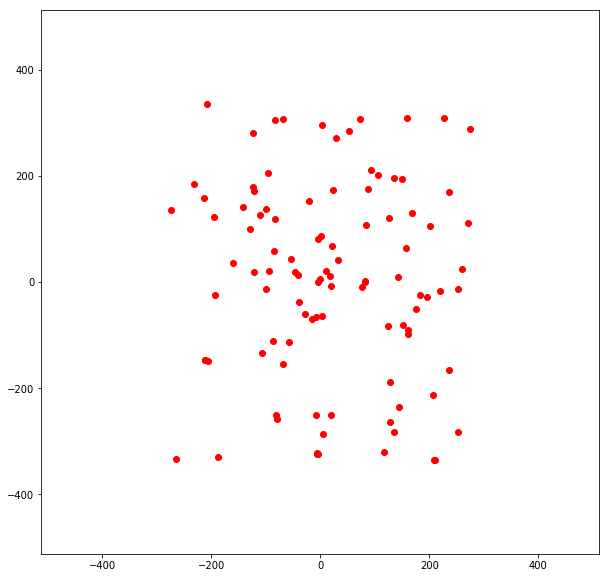

In [23]:
# Display sources in SAMOS CCD coordinates
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(RA_Offsets_IMpix, DEC_Offsets_IMpix, 'ro')
plt.axis([-512, 512, -512, 512])
plt.show()

In [24]:
# OFFsets in in SAMI pixels (SAMOS-SP Channel)
SP_CCD_Scale = 0.133
#
RA_Offsets_IMpix = RA_Offsets / SP_CCD_Scale # in pixels
DEC_Offsets_IMpix = DEC_Offsets / SP_CCD_Scale
print(np.c_[RA_Offsets_IMpix, DEC_Offsets_IMpix])


[[ 284.29172932 -453.09924812]
 [ 281.1518797  -453.88421053]
 [ -54.29774436  -51.8481203 ]
 [ -78.87518797 -151.78195489]
 [-263.04360902  -33.00902256]
 [-110.16541353 -340.2       ]
 [-106.78195489 -348.4556391 ]
 [-254.81503759 -445.46616541]
 [-128.24661654   27.08120301]
 [  26.22857143 -338.33233083]
 [ -38.32781955  -82.10977444]
 [-117.14887218 -149.96842105]
 [ 182.67969925 -382.53383459]
 [ 172.74586466 -356.76541353]
 [  -9.0406015  -437.56240602]
 [ 158.86015038 -434.01654135]
 [ -92.65263158 -210.27518797]
 [   4.92631579  -86.57593985]
 [ -11.07067669  -89.52631579]
 [ -10.90827068 -338.41353383]
 [-280.25864662 -200.44962406]
 [  -7.57894737 -436.99398496]
 [-164.46315789   25.99849624]
 [-357.72631579 -450.69022556]
 [   5.41353383 -386.26917293]
 [-287.72932331 -199.36691729]
 [ -20.67969925  -94.83157895]
 [-135.36541353  -16.57894737]
 [-144.56842105 -182.07067669]
 [ 142.40300752  273.50526316]
 [  -6.8481203    -0.87969925]
 [ 227.17894737  175.35789474]
 [  37.6

##  Display the sources in SAMI/SAMOS field of view, assumed centered in the CCD field, assumed centered in the middle of the 4098x4098 detector

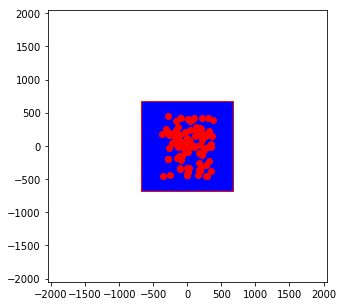

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
plt.figure(figsize=(5,5))
plt.plot(RA_Offsets_IMpix, DEC_Offsets_IMpix, 'ro')
plt.axis([-2048, 2048, -2048, 2048])
rectangle = plt.Rectangle((-675,-675),1350, 1350, fc='blue',ec="red")
plt.gca().add_patch(rectangle)
plt.show()

## Display the trace of the spectra in SAMI/SAMOS field of view, assumed 2000 pixels long.

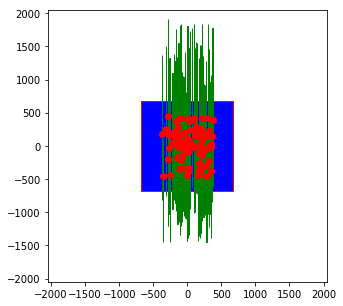

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
plt.figure(figsize=(5,5))
plt.plot(RA_Offsets_IMpix, DEC_Offsets_IMpix, 'ro')
plt.axis([-2048, 2048, -2048, 2048])
rectangle = plt.Rectangle((-675,-675),1350, 1350, fc='blue',ec="red")
plt.gca().add_patch(rectangle)
for i in range(len(RA_Offsets_IMpix)):
#    print(RA_Offsets_IMpix.iloc[i])
#    print(np.round(RA_Offsets_IMpix.iloc[i]-1),np.round(DEC_Offsets_IMpix.iloc[i]-1000,3, np.round(DEC_Offsets_IMpix.iloc[i]+1000))
    xy = (RA_Offsets_IMpix.iloc[i]-1,np.round(DEC_Offsets_IMpix.iloc[i]-1000))
    rectangle = plt.Rectangle(xy ,3, np.round(DEC_Offsets_IMpix.iloc[i]+2000), fc='green',ec="green")
    plt.gca().add_patch(rectangle)
plt.show()

In [27]:
## Zoom-in

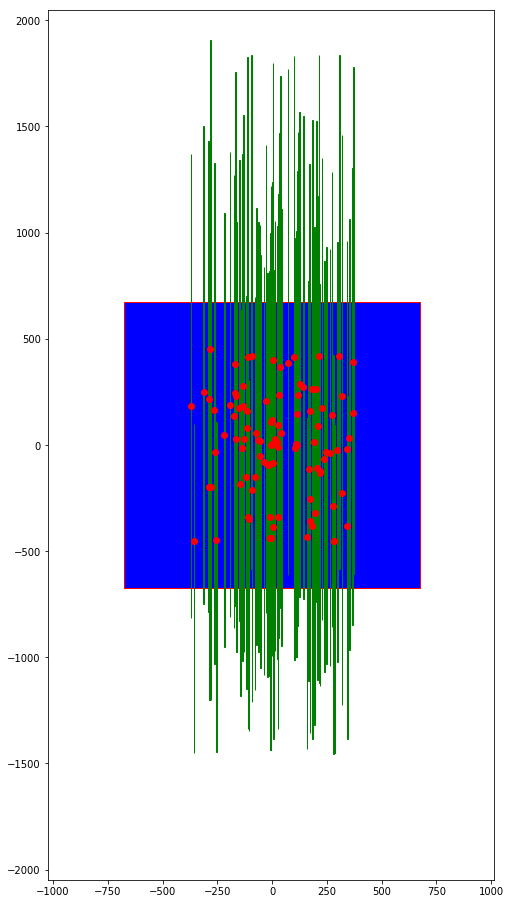

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
plt.figure(figsize=(8,16))
plt.plot(RA_Offsets_IMpix, DEC_Offsets_IMpix, 'ro')
plt.axis([-1024, 1014, -2048, 2048])
rectangle = plt.Rectangle((-675,-675),1350, 1350, fc='blue',ec="red")
plt.gca().add_patch(rectangle)
for i in range(len(RA_Offsets_IMpix)):
    xy = (RA_Offsets_IMpix.iloc[i]-1,np.round(DEC_Offsets_IMpix.iloc[i]-1000))
    rectangle = plt.Rectangle(xy ,3, np.round(DEC_Offsets_IMpix.iloc[i]+2000), fc='green',ec="green")
    plt.gca().add_patch(rectangle)
plt.show()

# to be continued...